In [42]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.graph_objects as go
import module.lib.functions as func
%matplotlib tk

In [5]:
images = np.load("data/data.npy")
#images = images[::4,0::4,0::4]
images.shape

(100, 100, 100)

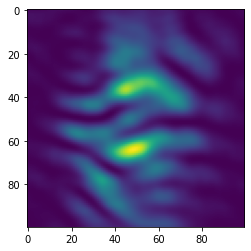

In [22]:
plt.imshow(images[-1,:,:])

In [8]:
X, Y, Z = np.mgrid[0:images.shape[0], 0:images.shape[1], 0:images.shape[2]]
X, Y, Z = X / np.max(X), Y/np.max(Y), Z/np.max(Z)

fig = go.Figure(data=go.Volume(
    x=-Y.flatten(),
    y=-Z.flatten(),
    z=X.flatten(),
    value=images.flatten(),
    isomin=0.02,
    isomax=1.0,
    opacity=0.1, # needs to be small to see through all surfaces
    opacityscale="uniform",
    surface_count=25, # needs to be a large number for good volume rendering
    colorscale='agsunset'
    ))
angle = np.pi / 4 # 45 degrees

name = 'vertical is along y+z'
camera = dict(
    up=dict(x=1, y=0, z=0),
    eye=dict(x=2*np.sin(np.deg2rad(35)), y=2*np.sin(np.deg2rad(38.5)), z=2*np.sin(np.deg2rad(35)))
)

fig.update_layout(
    template="simple_white",
    scene_camera=camera,
    scene = dict(
            xaxis = dict(
                nticks=1,
                #backgroundcolor="rgb(0, 0, 0)",
                #gridcolor="rgb(0, 0, 0)"
            ),
            yaxis = dict(
                nticks=1,
                #backgroundcolor="rgb(0, 0, 0)",
                #gridcolor="rgb(0, 0, 0)"
            ),
            zaxis = dict(
                nticks=1,
                #backgroundcolor="rgb(0, 0, 0)",
                #gridcolor="rgb(0, 0, 0)"
            )),
    scene_dragmode='orbit', title=name,
    scene_xaxis_showticklabels=False,
    scene_yaxis_showticklabels=False,
    scene_zaxis_showticklabels=False,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.show()

In [7]:
fig.write_image("images/diffractive_3d.png") # test.pngとして保存
fig.write_html("images/diffractive_3d.html") # test.htmlとして保存

KeyboardInterrupt: 

In [45]:
wl = 1000e-9
d = 1.0e-6
z = np.linspace(0, 0.5e-3, 50)
x = np.linspace(-d*10, d*10, 200)
XX, YY = np.meshgrid(x, x)
aperture = np.where(XX**2 + YY**2 < d**2, 1., 0.)
props = []

for _z in z:
    props.append(np.abs(func.angular_spectrum(aperture, wl, _z, d))**2/2)

props = np.array(props)

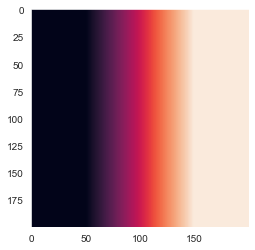

In [50]:
plt.imshow(XX, vmin=-5*d, vmax=5*d)
plt.grid(False)

In [46]:
X, Y, Z = np.mgrid[0:props.shape[0], 0:props.shape[1], 0:props.shape[2]]
X, Y, Z = X / np.max(X), Y/np.max(Y), Z/np.max(Z)

fig = go.Figure(data=go.Volume(
    x=-Y.flatten(),
    y=-Z.flatten(),
    z=X.flatten(),
    value=props.flatten(),
    isomin=0.01,
    isomax=1.0,
    opacity=0.1, # needs to be small to see through all surfaces
    opacityscale="uniform",
    surface_count=15, # needs to be a large number for good volume rendering
    colorscale='agsunset'
    ))
angle = np.pi / 4 # 45 degrees

name = 'vertical is along y+z'
camera = dict(
    up=dict(x=1, y=0, z=0),
    eye=dict(x=1.5, y=2., z=1.5)
)

fig.update_layout(
    template="simple_white",
    scene_camera=camera,
    scene = dict(
            xaxis = dict(
                nticks=1,
                #backgroundcolor="rgb(0, 0, 0)",
                #gridcolor="rgb(0, 0, 0)"
            ),
            yaxis = dict(
                nticks=1,
                #backgroundcolor="rgb(0, 0, 0)",
                #gridcolor="rgb(0, 0, 0)"
            ),
            zaxis = dict(
                nticks=1,
                #backgroundcolor="rgb(0, 0, 0)",
                #gridcolor="rgb(0, 0, 0)"
            )),
    scene_dragmode='orbit', title=name,
    scene_xaxis_showticklabels=False,
    scene_yaxis_showticklabels=False,
    scene_zaxis_showticklabels=False
)
fig.show()

In [52]:
x = np.linspace(-np.pi, np.pi,300)
y = np.linspace(-np.pi, np.pi,300)
XX, YY = np.meshgrid(x,y)

_Z1 = 2*np.sin((XX+YY)/2)*np.cos((XX-YY)/2)
Z1 = np.arcsin(_Z1)

_Z2 = 2*np.sin((-XX-YY)/2)*np.cos((-XX+YY)/2)
Z2 = np.arcsin(_Z2)

Z3 = Z1 - Z2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.sin(XX), np.sin(YY), Z3, cmap='bwr', linewidth=0)

/var/folders/dq/z_0g0_d101gg2c_06s9yqp8h0000gn/T/ipykernel_70670/3110682093.py:6: RuntimeWarning:

invalid value encountered in arcsin

/var/folders/dq/z_0g0_d101gg2c_06s9yqp8h0000gn/T/ipykernel_70670/3110682093.py:9: RuntimeWarning:

invalid value encountered in arcsin



In [44]:
plt.plot(x, Z3[150,:])
plt.ylim(-np.pi/50, np.pi/50)
plt.xlim(-np.pi/50, np.pi/50)

(-0.06283185307179587, 0.06283185307179587)

In [49]:
y1 = np.sin(x)
y2 = np.sin(-x)
plt.plot(np.arcsin(-x))

/var/folders/dq/z_0g0_d101gg2c_06s9yqp8h0000gn/T/ipykernel_70670/783929921.py:3: RuntimeWarning:

invalid value encountered in arcsin

